In [1]:
import pandas as pd
import numpy as np
from dataloading import DataLoader
from eda_py import EDA
from eALS_adaptor import eALSAdaptor
from implicit.evaluation import train_test_split, ranking_metrics_at_k
from cv_py import CrossValidation
from visualize_py import Visualize
from lightFM_adoptor import LightFMAdaptor
from lightfm import LightFM
from datapreparation_py import DataPreparation
from scipy import sparse

%cd C:\Users\781110104\OneDrive - Genpact\Documents\VSCode

C:\Users\781110104\OneDrive - Genpact\Documents\VSCode


c:\Users\781110104\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn(


In [2]:
dl = DataLoader()
user_item_co = dl.import_data('AGCO', 'CO', 'df')

In [3]:
user_item_co_filtered = dl.remove_low_interact_items(user_item_co, 1)
user_item_filtered_log_t = dl.log_scale_df(user_item_co_filtered, 0.01)

In [4]:
dp = DataPreparation(user_item_filtered_log_t)

In [5]:
interactions_csr, weights_csr = dp.get_interaction_data()

In [106]:
sparse.save_npz('interactions_csr.npz', interactions_csr)
sparse.save_npz('weights_csr.npz', weights_csr)

In [6]:
user_features = ['country', 'currency', 'dealer_size']
item_features = ['group2', 'movement_code', 'cost_class', 'cps_category']   
return_list = dp.get_feature_data(OEM='AGCO', user_features=user_features, item_features=item_features)

In [7]:
userf, itemf = return_list

In [8]:
item_features = ['group2']   
itemf_group = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [9]:
item_features = ['movement_code']   
itemf_move = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [10]:
item_features = ['cost_class']   
itemf_cost = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [11]:
item_features = ['cps_category']   
itemf_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [12]:
item_features = ['group2', 'movement_code']   
itemf_group_move = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [13]:
item_features = ['group2', 'cost_class']   
itemf_group_cost = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [14]:
item_features = ['group2', 'cps_category']   
itemf_group_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [15]:
item_features = ['movement_code', 'cost_class']   
itemf_move_cost = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [16]:
item_features = ['movement_code', 'cps_category']   
itemf_move_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [17]:
item_features = ['cost_class', 'cps_category']   
itemf_cost_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [18]:
item_features = ['group2', 'movement_code', 'cost_class']   
itemf_group_move_cost = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [19]:
item_features = ['group2', 'movement_code', 'cps_category']   
itemf_group_move_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [20]:
item_features = ['group2', 'cost_class', 'cps_category']   
itemf_group_cost_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [21]:
item_features = ['movement_code', 'cost_class', 'cps_category']
itemf_move_cost_cps = dp.get_feature_data(OEM='AGCO', item_features=item_features)

In [22]:
user_features = ['country']   
userf_country = dp.get_feature_data(OEM='AGCO', user_features=user_features)

In [23]:
user_features = ['currency']   
userf_curr = dp.get_feature_data(OEM='AGCO', user_features=user_features)

In [24]:
user_features = ['dealer_size']   
userf_ds = dp.get_feature_data(OEM='AGCO', user_features=user_features)

In [25]:
user_features = ['country', 'currency']   
userf_country_curr = dp.get_feature_data(OEM='AGCO', user_features=user_features)

In [26]:
user_features = ['country', 'dealer_size']   
userf_country_ds = dp.get_feature_data(OEM='AGCO', user_features=user_features)

In [27]:
user_features = ['currency', 'dealer_size']   
userf_curr_ds = dp.get_feature_data(OEM='AGCO', user_features=user_features)

In [42]:
sparse.save_npz('itemf_move_cost_cps.npz', itemf_move_cost_cps[0])
sparse.save_npz('itemf_group_cost_cps.npz', itemf_group_cost_cps[0])
sparse.save_npz('itemf_group_move_cps.npz', itemf_group_move_cps[0])
sparse.save_npz('itemf_group_move_cost.npz', itemf_group_move_cost[0])
sparse.save_npz('itemf_cost_cps.npz', itemf_cost_cps[0])
sparse.save_npz('itemf_move_cps.npz', itemf_move_cps[0])
sparse.save_npz('itemf_move_cost.npz', itemf_move_cost[0])
sparse.save_npz('itemf_group_cps.npz', itemf_group_cps[0])
sparse.save_npz('itemf_group_cost.npz', itemf_group_cost[0])
sparse.save_npz('itemf_group_move.npz', itemf_group_move[0])
sparse.save_npz('itemf_cps.npz', itemf_cps[0])
sparse.save_npz('itemf_cost.npz', itemf_cost[0])
sparse.save_npz('itemf_move.npz', itemf_move[0])
sparse.save_npz('itemf_group.npz', itemf_group[0])
sparse.save_npz('itemf.npz', itemf)

In [105]:
sparse.save_npz('userf.npz', userf)
sparse.save_npz('userf_country.npz', userf_country[0])
sparse.save_npz('userf_curr.npz', userf_curr[0])
sparse.save_npz('userf_ds.npz', userf_ds[0])
sparse.save_npz('userf_country_curr.npz', userf_country_curr[0])
sparse.save_npz('userf_country_ds.npz', userf_country_ds[0])
sparse.save_npz('userf_curr_ds.npz', userf_curr_ds[0])

In [6]:
itemf_move_cost_cps = sparse.load_npz('itemf_move_cost_cps.npz')
itemf_group_cost_cps = sparse.load_npz('itemf_group_cost_cps.npz')
itemf_group_move_cps = sparse.load_npz('itemf_group_move_cps.npz')
itemf_group_move_cost = sparse.load_npz('itemf_group_move_cost.npz')
itemf_cost_cps = sparse.load_npz('itemf_cost_cps.npz')
itemf_move_cps = sparse.load_npz('itemf_move_cps.npz')
itemf_move_cost = sparse.load_npz('itemf_move_cost.npz')
itemf_group_cps = sparse.load_npz('itemf_group_cps.npz')
itemf_group_cost = sparse.load_npz('itemf_group_cost.npz')
itemf_group_move = sparse.load_npz('itemf_group_move.npz')
itemf_cps = sparse.load_npz('itemf_cps.npz')
itemf_cost = sparse.load_npz('itemf_cost.npz')
itemf_move = sparse.load_npz('itemf_move.npz')
itemf_group = sparse.load_npz('itemf_group.npz')
itemf = sparse.load_npz('itemf.npz')

In [43]:
train_i, test_i = train_test_split(interactions_csr, 0.8, 22)
train_w, test_w = train_test_split(weights_csr, 0.8, 22)

In [44]:
cv = CrossValidation(5)

In [45]:
cal_w, val_w = train_test_split(train_w, 0.8, 22)

In [84]:
userf

<303x337 sparse matrix of type '<class 'numpy.float32'>'
	with 1350 stored elements in Compressed Sparse Row format>

In [46]:
space_FM_warp = {'factors' : [40], 'regularization' : [0.0001], 
'learning_rate' : [0.1], 'iterations' : [10], 'loss' : ['warp'], 'max_sampled' : [30]}

uf_combi = [None, userf_country[0], userf_ds[0], userf_curr[0], userf_country_ds[0], userf_country_curr[0], userf_curr_ds[0], userf]
if_combi = [None, itemf_group[0], itemf_move[0], itemf_cost[0], itemf_group_move[0], itemf_group_cost[0], itemf_move_cost[0], itemf]

uf_names = ['None', 'userf_country', 'userf_ds', 'userf_curr', 'userf_country_ds', 'userf_country_curr', 'userf_curr_ds', 'userf']
if_names = ['None', 'itemf_group', 'itemf_move', 'itemf_cost', 'itemf_group_move', 'itemf_group_cost', 'itemf_move_cost', 'itemf']

In [85]:
space_FM_warp = {'factors' : [10, 20, 30, 40, 50], 'regularization' : [0.0001], 
'learning_rate' : [0.1], 'iterations' : [2, 4, 6, 8, 10, 12], 'loss' : ['warp'], 'max_sampled' : [30]}

uf_combi = [userf_country_ds[0]]
if_combi = [itemf_group_move[0]]

uf_names = ['userf_country_ds']
if_names = ['itemf_group_move']

In [86]:
results_warp = cv.tune_FM(space=space_FM_warp, user_f=uf_combi, item_f=if_combi, uf_names=uf_names, 
if_names=if_names, train=cal_w, test=val_w, exclude=test_w)

In [90]:
def get_convergence_curves(result_frame, save=False):

    from matplotlib import pyplot as plt
    # data preparation
    p_df = result_frame.pivot(index='iterations', columns='factors', values='precision')
    map_df = result_frame.pivot(index='iterations', columns='factors', values='map')
    ndcg_df = result_frame.pivot(index='iterations', columns='factors', values='ndcg')
    mpr_df = result_frame.pivot(index='iterations', columns='factors', values='mpr')
    data_df = [p_df, map_df, ndcg_df, mpr_df]
    names = ['P@10', 'MAP@10', 'NDCG@10', 'MPR']

    # plotting of the four curves
    fig, ax = plt.subplots(figsize=(17, 15), nrows=2, ncols=2)
    plt.subplots_adjust(wspace=0.2, hspace=0.3, right=0.82)
    c = 0
    for i in range(2):
        for j in range(2):
            data_filtered = data_df[c]
            ax[i,j].plot(data_filtered, linestyle='-', marker='o', linewidth=2)
            ax[i,j].set_title(names[c], fontsize=30)
            ax[i,j].set_xlabel('Iterations', fontsize=25)
            ax[i,j].tick_params(axis='both', which='major', labelsize=17)
            ax[i,j].tick_params(axis='both', which='minor', labelsize=17)
            #ax[i,j].autoscale()
            ax[i,j].grid(linestyle=':')
            c += 1
    fig.legend(data_filtered.columns, loc='center right', ncol=1, title='Factors',fancybox=True, shadow=False, frameon=True, title_fontsize=25, fontsize=20,
    bbox_to_anchor=(0.94, 0.79))
    if save:
        plt.savefig('curves.pdf')
    plt.show()

In [92]:
results_warp

,factors,regularization,learning_rate,iterations,loss,max_sampled,precision,map,ndcg,auc,mpr,uf_name,if_name
0,10,0.0001,0.1,2,warp,30,0.641254,0.539260,0.655544,0.503378,0.102057,userf_country_ds,itemf_group_move
1,10,0.0001,0.1,4,warp,30,0.655116,0.554484,0.664881,0.503468,0.090952,userf_country_ds,itemf_group_move
2,10,0.0001,0.1,6,warp,30,0.670627,0.566477,0.678704,0.503688,0.091082,userf_country_ds,itemf_group_move
3,10,0.0001,0.1,8,warp,30,0.666007,0.567820,0.681740,0.503638,0.092053,userf_country_ds,itemf_group_move
4,10,0.0001,0.1,10,warp,30,0.667987,0.561536,0.673104,0.503623,0.092826,userf_country_ds,itemf_group_move
5,10,0.0001,0.1,12,warp,30,0.655446,0.549883,0.664998,0.503521,0.093349,userf_country_ds,itemf_group_move
6,20,0.0001,0.1,2,warp,30,0.664026,0.566820,0.675351,0.503549,0.095960,userf_country_ds,itemf_group_move
7,20,0.0001,0.1,4,warp,30,0.657426,0.549998,0.664859,0.503404,0.093099,userf_country_ds,itemf_group_move
8,20,0.0001,0.1,6,warp,30,0.655116,0.547624,0.663810,0.503464,0.095542,userf_country_ds,itemf_group_move
9,20,0.0001,0.1,8,warp,30,0.651485,0.541130,0.660927,0.503476,0.097900,userf_country_ds,itemf_group_move


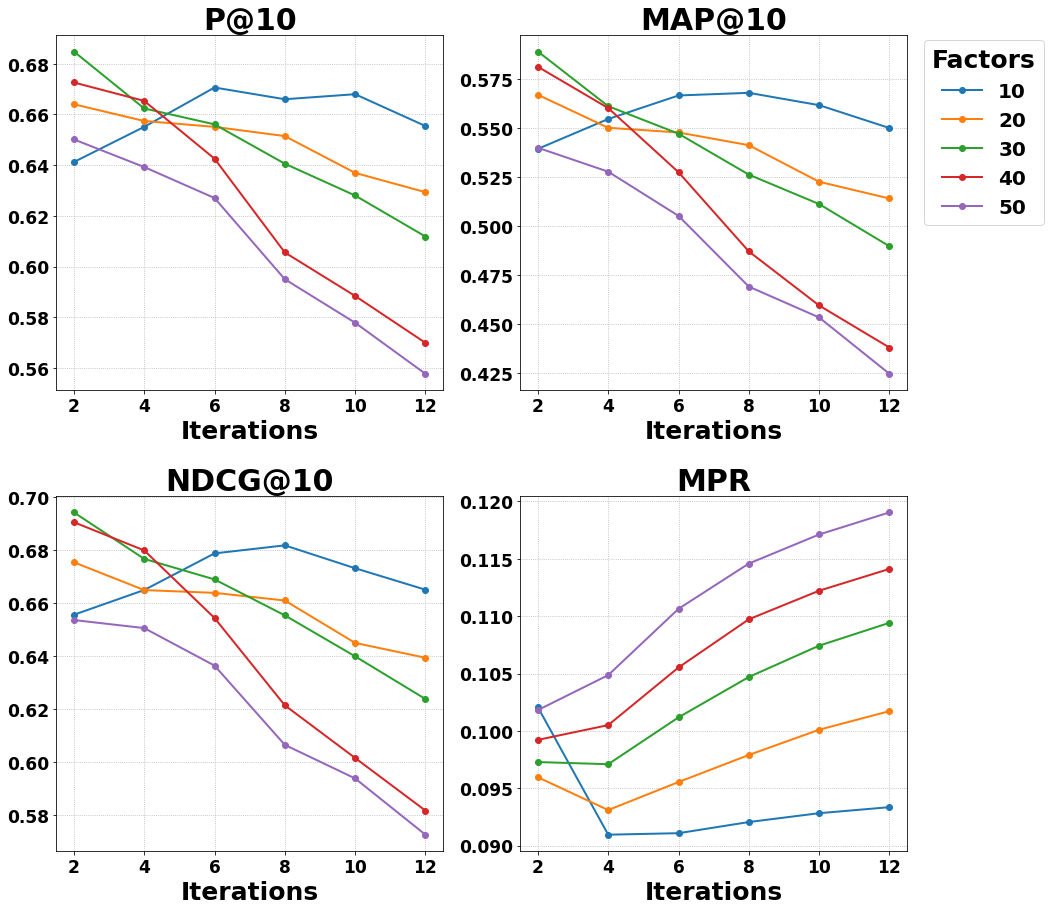

In [91]:
get_convergence_curves(results_warp)

In [93]:
space_FM_warp = {'factors' : [40], 'regularization' : [0.0001, 0.001, 0.01], 
'learning_rate' : [0.1], 'iterations' : [10], 'loss' : ['warp'], 'max_sampled' : [30]}

uf_combi = [None, userf_country, userf_ds, userf_curr, userf_country_ds, userf_country_curr, userf_curr_ds, userf]
if_combi = [None, itemf_group, itemf_move, itemf_cost, itemf_cps, itemf_group_move, itemf_group_cost, itemf_move_cost, 
itemf_group_cps, itemf_cost_cps, itemf_move_cps, itemf_group_cost_cps, itemf_group_move_cps, itemf_move_cost_cps, itemf]

uf_names = ['None', 'userf_country', 'userf_ds', 'userf_curr', 'userf_country_ds', 'userf_country_curr', 'userf_curr_ds', 'userf']
if_names = ['None', 'itemf_group', 'itemf_move', 'itemf_cost', 'itemf_cps', 'itemf_group_move', 'itemf_group_cost', 'itemf_move_cost', 
'itemf_group_cps', 'itemf_cost_cps', 'itemf_move_cps', 'itemf_group_cost_cps', 'itemf_group_move_cps', 'itemf_move_cost_cps', 'itemf']

In [94]:
results_warp = cv.tune_FM(space=space_FM_warp, user_f=uf_combi, item_f=if_combi, uf_names=uf_names, 
if_names=if_names, train=cal_w, test=val_w, exclude=test_w)

In [101]:
results_warp.sort_values('precision', ascending=False).head(70)

,factors,regularization,learning_rate,iterations,loss,max_sampled,precision,map,ndcg,auc,mpr,uf_name,if_name
0,40,0.0001,0.1,10,warp,30,0.704290,0.621994,0.721306,0.503863,0.105141,None,None
0,40,0.0001,0.1,10,warp,30,0.699010,0.598916,0.714163,0.503948,0.104895,None,itemf_group
0,40,0.0001,0.1,10,warp,30,0.675578,0.568997,0.684009,0.503845,0.107103,userf_curr,None
0,40,0.0001,0.1,10,warp,30,0.662046,0.547149,0.672190,0.503816,0.107768,userf_curr,itemf_group
0,40,0.0001,0.1,10,warp,30,0.660396,0.543496,0.666369,0.503785,0.117595,None,itemf_cost
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,40,0.0010,0.1,10,warp,30,0.557756,0.473958,0.601058,0.502843,0.158438,userf_curr,None
1,40,0.0010,0.1,10,warp,30,0.557756,0.475830,0.601935,0.502930,0.158417,userf_country_curr,None
1,40,0.0010,0.1,10,warp,30,0.554455,0.478105,0.603850,0.502853,0.158756,userf_curr_ds,None
0,40,0.0001,0.1,10,warp,30,0.554125,0.408250,0.557462,0.503173,0.117787,userf_country_ds,itemf_move_cost


In [102]:
space_FM_warp_add = {'factors' : [40], 'regularization' : [0.00001], 
'learning_rate' : [0.1], 'iterations' : [10], 'loss' : ['warp'], 'max_sampled' : [30]}

uf_combi = [None, userf_country[0], userf_ds[0], userf_curr[0], userf_country_ds[0], userf_country_curr[0], userf_curr_ds[0], userf]
if_combi = [None, itemf_group[0], itemf_move[0], itemf_cost[0], itemf_group_move[0], itemf_group_cost[0], itemf_move_cost[0], itemf]

uf_names = ['None', 'userf_country', 'userf_ds', 'userf_curr', 'userf_country_ds', 'userf_country_curr', 'userf_curr_ds', 'userf']
if_names = ['None', 'itemf_group', 'itemf_move', 'itemf_cost', 'itemf_group_move', 'itemf_group_cost', 'itemf_move_cost', 'itemf']

In [103]:
results_warp_add = cv.tune_FM(space=space_FM_warp, user_f=uf_combi, item_f=if_combi, uf_names=uf_names, 
if_names=if_names, train=cal_w, test=val_w, exclude=test_w)

KeyboardInterrupt: 